In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import numpy as np

#knn implementation as a class so we can call it easier
class SimpleKNN:
    def __init__(self, k=5, distance_metric='euclidean'):
        self.k = k
        self.distance_metric = distance_metric
    
    def fit(self, X_train, y_train):
        # Just store the training data
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, X_test):
        predictions = []
        for test_point in X_test:
            # Calculate distances to all training points
            if self.distance_metric == 'euclidean':
                distances = np.sqrt(np.sum((self.X_train - test_point)**2, axis=1))
            elif self.distance_metric == 'manhattan':
                distances = np.sum(np.abs(self.X_train - test_point), axis=1)
            
            # Get the indices of the k nearest neighbors
            k_nearest_indices = np.argsort(distances)[:self.k]
            
            # Get the labels of these neighbors
            k_nearest_labels = self.y_train[k_nearest_indices]
            
            # The prediction is the most common label
            most_common = np.bincount(k_nearest_labels).argmax()
            predictions.append(most_common)
        
        return np.array(predictions)
    
    def accuracy(self, X_test, y_test):
        predictions = self.predict(X_test)
        return np.mean(predictions == y_test)


column_names = [
    'class', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 
    'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
    'proanthocyanins', 'color_intensity', 'hue', 'od280_od315', 'proline'
]

#--------------------------------------------------------------------

data = pd.read_csv(r'C:\Users\furka\Desktop\489ml\First\data\wine.data', header=None, names=column_names)


numerical_cols = data.columns.difference(['class'])

#Normalizations
data[numerical_cols] = MinMaxScaler().fit_transform(data[numerical_cols])

data[numerical_cols] = StandardScaler().fit_transform(data[numerical_cols])



X = data.drop('class', axis=1).values.astype(np.float64)
y = data['class'].values.astype(np.int64)
    
#Splitting
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,  
    stratify=y 
)

In [ ]:
# Try different k values
k_values = [1, 3, 5, 7, 9]
euclidean_accuracies = []
manhattan_accuracies = []

for k in k_values:
    # Test Euclidean distance
    knn_euclidean = SimpleKNN(k=k, distance_metric='euclidean')
    knn_euclidean.fit(X_train, y_train)
    euclidean_accuracies.append(knn_euclidean.accuracy(X_test, y_test))
    
    # Test Manhattan distance
    knn_manhattan = SimpleKNN(k=k, distance_metric='manhattan')
    knn_manhattan.fit(X_train, y_train)
    manhattan_accuracies.append(knn_manhattan.accuracy(X_test, y_test))

# Print results
print("k\tEuclidean\tManhattan")
print("----------------------------")
for i, k in enumerate(k_values):
    print(f"{k}\t{euclidean_accuracies[i]:.4f}\t\t{manhattan_accuracies[i]:.4f}")

k	Euclidean	Manhattan
----------------------------
1	0.9722		0.9722
3	0.9722		0.9722
5	0.9722		1.0000
7	1.0000		1.0000
9	1.0000		1.0000


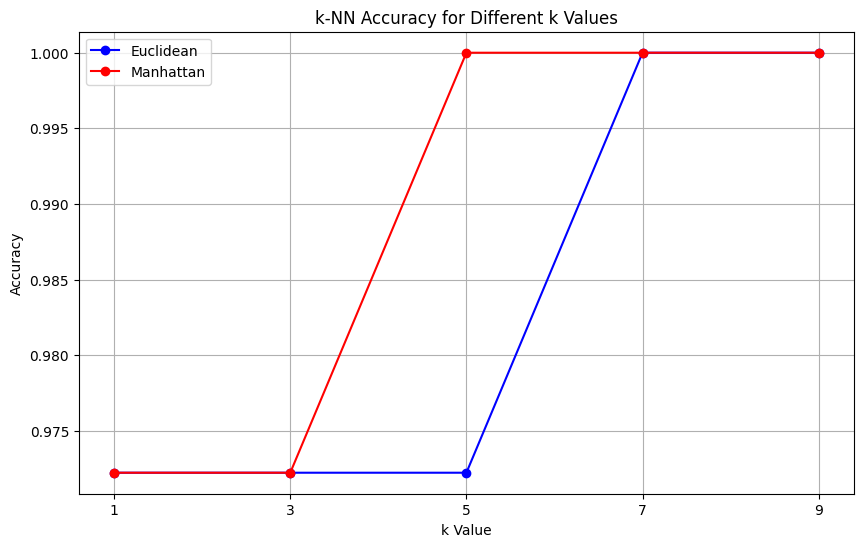

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, euclidean_accuracies, 'bo-', label='Euclidean')
plt.plot(k_values, manhattan_accuracies, 'ro-', label='Manhattan')
plt.title('k-NN Accuracy for Different k Values')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Use our best k (let's pick 5)
best_knn = SimpleKNN(k=5, distance_metric='euclidean')
best_knn.fit(X_train, y_train)
predictions = best_knn.predict(X_test)

# Create confusion matrix
confusion_matrix = np.zeros((3, 3))  # We have 3 classes
for true, pred in zip(y_test, predictions):
    confusion_matrix[true-1][pred-1] += 1  # Classes are 1,2,3 but indices are 0,1,2

print("\nConfusion Matrix:")
print("Rows = True class, Columns = Predicted class")
print(confusion_matrix)


Confusion Matrix:
Rows = True class, Columns = Predicted class
[[12.  0.  0.]
 [ 0. 13.  1.]
 [ 0.  0. 10.]]


In [ ]:
def simple_classification_report(y_true, y_pred):
    classes = np.unique(y_true)
    print("\nSimple Classification Report:")
    print("Class\tPrecision\tRecall")
    print("----------------------------")
    for c in classes:
        true_positives = np.sum((y_true == c) & (y_pred == c))
        predicted_positives = np.sum(y_pred == c)
        actual_positives = np.sum(y_true == c)
        
        precision = true_positives / predicted_positives if predicted_positives > 0 else 0
        recall = true_positives / actual_positives if actual_positives > 0 else 0
        
        print(f"{c}\t{precision:.2f}\t\t{recall:.2f}")

simple_classification_report(y_test, predictions)


Simple Classification Report:
Class	Precision	Recall
----------------------------
1	1.00		1.00
2	1.00		0.93
3	0.91		1.00
